In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib  inline

In [2]:
data = pd.read_csv("./data/telecom_churn.csv")

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# 1. Признаки по одному
#  Количественные

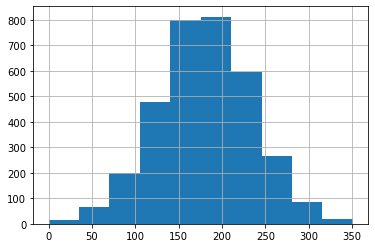

In [5]:
data['Total day minutes'].hist();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


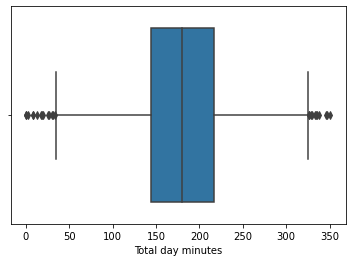

In [6]:
sns.boxplot(data['Total day minutes']);

In [8]:
# Категориальные 

In [10]:
data['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [11]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


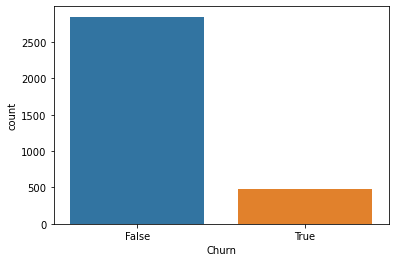

In [17]:
sns.countplot(data['Churn']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


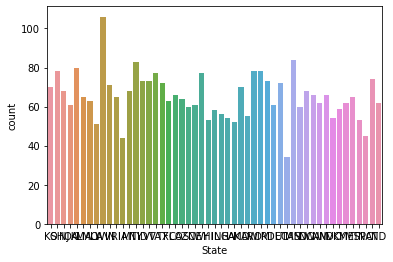

In [13]:
sns.countplot(data['State']);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


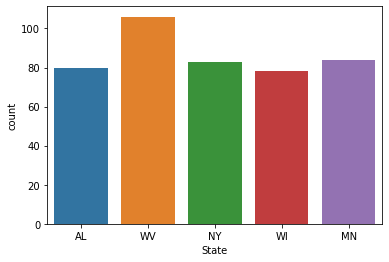

In [22]:
sns.countplot(data[data['State'].isin(data['State'].value_counts().head().index)]['State']);

In [24]:
# Взаимодействие признаков

In [25]:
# Количественные - Количественные

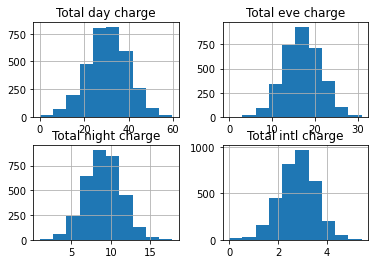

In [30]:
feat = [f for f in data.columns if 'charge' in f]

#data.columns
data[feat].hist();

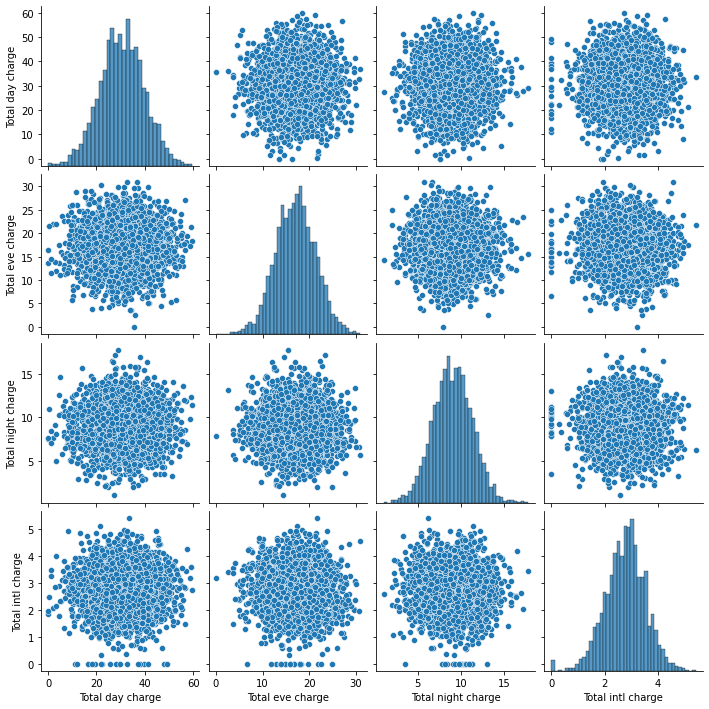

In [31]:
sns.pairplot(data[feat]);

In [42]:
clr = data['Churn'].map({False: 'blue', True: 'orange'})

In [47]:
data[~data['Churn']].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


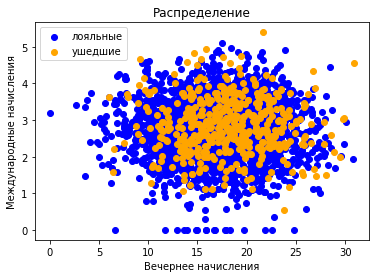

In [50]:
plt.scatter(data[~data['Churn']]['Total eve charge'], data[~data['Churn']]['Total intl charge'], color = 'blue', 
            label = 'лояльные');
plt.scatter(data[data['Churn']]['Total eve charge'], data[data['Churn']]['Total intl charge'], color = 'orange', 
            label = 'ушедшие');
plt.xlabel('Вечернее начисления');
plt.ylabel('Международные начисления');
plt.title('Распределение')
plt.legend();

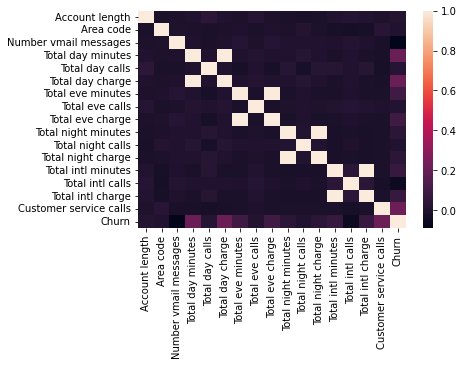

In [52]:
sns.heatmap(data.corr());

In [56]:
data.drop(feat, axis = 1, inplace = True)

In [57]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

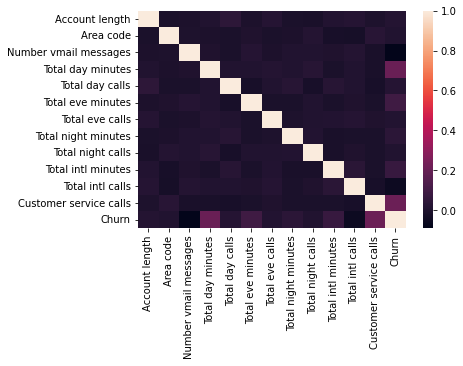

In [58]:
sns.heatmap(data.corr());

In [59]:
# Взаимодействие количественного - категориального и количественного - бинарного

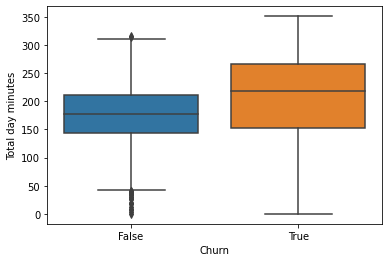

In [61]:
sns.boxplot(x = 'Churn', y = 'Total day minutes', data = data);

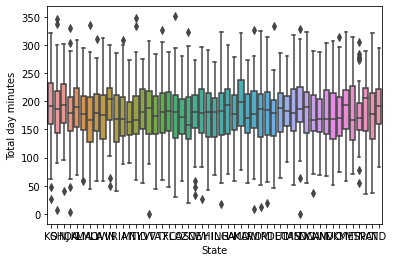

In [62]:
sns.boxplot(x = 'State', y = 'Total day minutes', data = data);

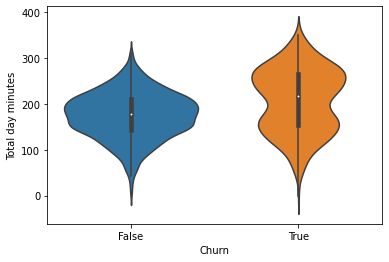

In [64]:
sns.violinplot(x = 'Churn', y = 'Total day minutes', data = data);

In [66]:
data.groupby('International plan')['Total day minutes'].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

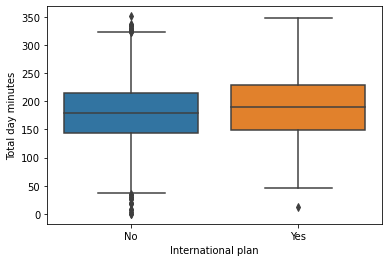

In [67]:
sns.boxplot(x = 'International plan', y = 'Total day minutes', data = data);

In [68]:
# Катег - Катег, Бин - Бин, Кол - Кол

In [69]:
pd.crosstab(data['Churn'], data['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


<AxesSubplot:xlabel='International plan', ylabel='count'>

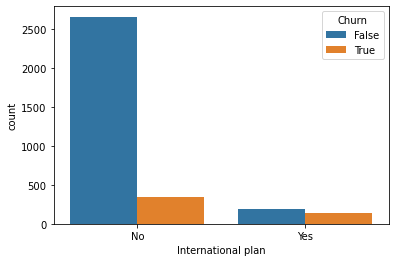

In [70]:
sns.countplot(x = 'International plan', hue = 'Churn', data = data)

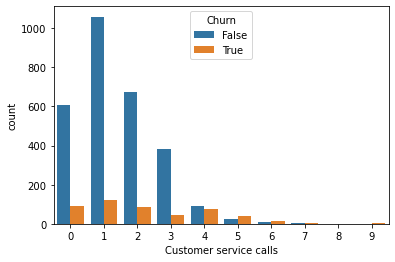

In [72]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = data);

In [74]:
## t-SNE

In [76]:
from sklearn.manifold import TSNE

In [77]:
tsne = TSNE(random_state=0)

In [93]:
df_2 = data.drop('State', axis = 1)

In [94]:
df_2['International plan'] = df_2['International plan'].map({'Yes': 1, 'No': 0})

In [97]:
df = df_2['Voice mail plan'] = df_2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [98]:
df_2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [99]:
df_2.info

<bound method DataFrame.info of       Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25         

In [102]:
%%time
tsne.fit_transform(df_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 1min 44s
Wall time: 14.5 s


array([[-47.165176,  26.897821],
       [ -5.302961,  23.831131],
       [-38.274414,  43.156475],
       ...,
       [ 60.059387, -39.570778],
       [ 62.078037, -20.341328],
       [-44.24408 ,  13.647198]], dtype=float32)

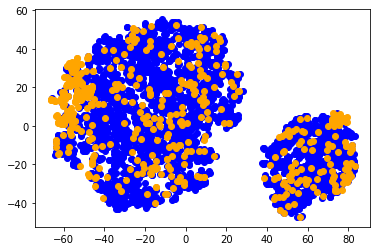

In [109]:
plt.scatter(tsne.embedding_[~df_2['Churn'].values, 0], 
            tsne.embedding_[~df_2['Churn'].values, 1],
            color = 'blue');
plt.scatter(tsne.embedding_[df_2['Churn'].values, 0], 
            tsne.embedding_[df_2['Churn'].values, 1],
            color = 'orange');

In [105]:
tsne.embedding_[df_2['Churn'].values, 0].shape

(483,)